C:\Users\lalo\Anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# -*- coding: utf-8 -*-
# =============================================================================
# Modules
# =============================================================================

# Import required libraries
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.data import Dataset, Iterator


# =============================================================================
# Functions for read and formating data
# =============================================================================

def read_data(path):
    
    # Read H5 file
    f = h5.File(path, "r")
    # Get and print list of datasets within the H5 file
    datasetNames = [n for n in f.keys()]
    for n in datasetNames:
        print(n)  
        
    return f



def formating(f, Tsize, Esize):

    # input: f -> h5.file object
        
    Ids = f['eventids']
    hits_u = f['hits-u-minerva13Cmc']
    hits_v = f['hits-v-minerva13Cmc']
    hits_x = f['hits-x-minerva13Cmc']
    plane_c = f['planecodes']
    segments = f['segments']
    zs = f['zs']
        
    # shuffle dataset
    perm = np.arange(Tsize + Esize)
    np.random.shuffle(perm)
    
    hits_x  = hits_x[perm]
    plane_c = plane_c[perm]
    
    # training and evaluation planes hits_x
    hitsx_train = hits_x[0:Tsize]
    hitsx_eval  = hits_x[Tsize: ]

    # training and evaluation labels
    planec_train = plane_c[0:Tsize]
    planec_eval  = plane_c[Tsize: ]
        
    return hitsx_train, planec_train, hitsx_eval, planec_eval


# =============================================================================
# TensorDataset
# =============================================================================



In [ ]:
class TensorDataset(object):
    # Inicialización
    def __init__(self,
               images,
               labels,
               one_hot=False,
               dtype=dtypes.float32,
               reshape=True,
               seed=None):
        
    assert images.shape[0] == labels.shape[0], (
        'images.shape: %s labels.shape: %s' % (images.shape, labels.shape))
    self._num_examples = images.shape[0]

    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0
        
        

    @property
    def images(self):
        return self._images

    @property
    def labels(self):
        return self._labels

    @property
    def num_examples(self):
        return self._num_examples
        
        
        
    return 0



In [3]:
np.arange(3)

array([0, 1, 2])

eventids
hits-u-minerva13Cmc
hits-v-minerva13Cmc
hits-x-minerva13Cmc
planecodes
segments
zs
size hits_u:  (127, 25)
size hits_v:  (127, 25)
size hits_x:  (127, 50)

 Plane_c:  [39 66 66 66 27 66 66 66 25  0 66  9 66 66 44 66 66 27 66 66]

 Segments:  [ 8 10 10 10  3 10 10 10  7  8 10  1 10 10  4 10 10  3 10 10]

 Zs:  [5521.26 7676.63 8295.08 6994.77 4908.55 7852.71 7142.86 8085.82 4859.49
 5366.48 6829.87 4487.53 7481.46 8022.59 5644.69 7533.27 6261.48 4927.48
 7774.12 6868.8 ]


Text(0.5,1,'hits_x image')

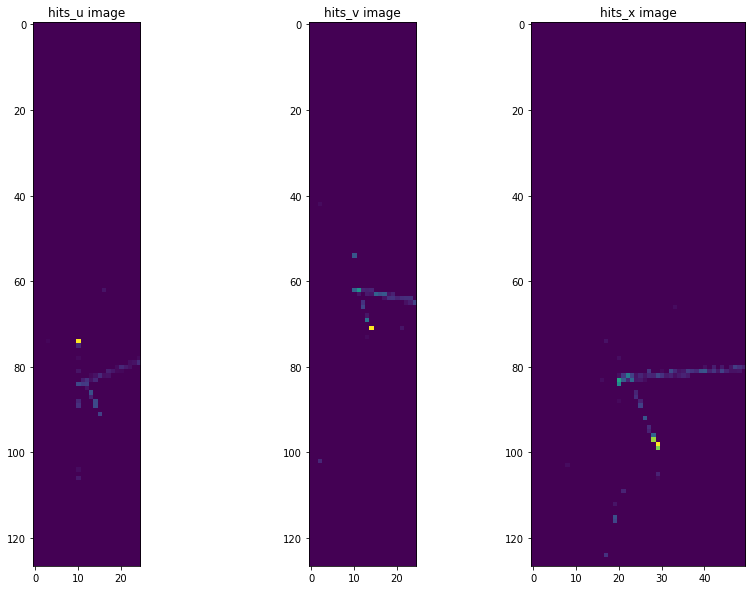

In [2]:
# Read H5 file
f = h5.File("dataset_minerva.hdf5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)
    
Ids = f['eventids']
hits_u = f['hits-u-minerva13Cmc']
hits_v = f['hits-v-minerva13Cmc']
hits_x = f['hits-x-minerva13Cmc']
plane_c = f['planecodes']
segments = f['segments']
zs = f['zs']

N = 104
Imu = hits_u[N][0]
Imv = hits_v[N][0]
Imx = hits_x[N][0]
print ('size hits_u: ', np.shape(Imu))
print ('size hits_v: ', np.shape(Imv))
print ('size hits_x: ', np.shape(Imx))


P = plane_c[0:20]
print ('\n Plane_c: ',P)

Seg = segments[0:20]
print ('\n Segments: ', Seg)

ZS = zs[0:20]
print ('\n Zs: ',ZS)

fig = plt.figure(figsize=(14, 10))
f1 = fig.add_subplot(131);f1.imshow(Imu);f1.set_title('hits_u image')
f2 = fig.add_subplot(132);f2.imshow(Imv);f2.set_title('hits_v image')
f3 = fig.add_subplot(133);f3.imshow(Imx);f3.set_title('hits_x image')

In [3]:
hits_x = np.squeeze(hits_x, axis=1)

In [4]:
Tsize = 40000
Esize = 10000
# training and evaluation planes hits_x
hits_xtrain = hits_x[0:Tsize]
hits_xeval  = hits_x[Tsize: ]

# training and evaluation labels
plane_ctrain = plane_c[0:Tsize]
plane_ceval  = plane_c[Tsize: ]
 
# define placeholders
hits_xtrain_tf = tf.convert_to_tensor(hits_xtrain, np.float32)
plane_ctrain_tf = tf.convert_to_tensor(plane_ctrain, np.float32)

# review type of training data -> Tensors!
print('\nType of training data vectors')
print('hits_xtrain_tf: ',np.shape(hits_xtrain_tf), type (hits_xtrain_tf))
print('plane_ctrain_tf: ',np.shape(plane_ctrain_tf), type (plane_ctrain_tf))

dataset = tf.data.Dataset.from_tensor_slices(
   {"hits_xtrain": hits_xtrain_tf, "plane_ctrain": plane_ctrain_tf})

print(dataset.output_types)  
print(dataset.output_shapes) 

tr_data = dataset
#tr_data = Dataset.from_tensor_slices((hits_xtrain_tf, plane_ctrain_tf))
print(tr_data.output_types)  
print(tr_data.output_shapes) 


Type of training data vectors
hits_xtrain_tf:  (40000, 127, 50) <class 'tensorflow.python.framework.ops.Tensor'>
plane_ctrain_tf:  (40000,) <class 'tensorflow.python.framework.ops.Tensor'>
{'hits_xtrain': tf.float32, 'plane_ctrain': tf.float32}
{'hits_xtrain': TensorShape([Dimension(127), Dimension(50)]), 'plane_ctrain': TensorShape([])}


{'hits_xtrain': tf.float32, 'plane_ctrain': tf.float32}
{'hits_xtrain': TensorShape([Dimension(127), Dimension(50)]), 'plane_ctrain': TensorShape([])}


In [8]:
iterator = Iterator.from_structure(tr_data.output_types, tr_data.output_shapes)
next_element = iterator.get_next()

training_init_op = iterator.make_initializer(tr_data)
batch_size = 5

with tf.Session() as sess:

    # initialize the iterator on the training data
    sess.run(training_init_op)

    batch = tr_data.batch(batch_size)
    
    print(batch)
    #try:
    #    elem = sess.run(next_element)
    #    print(elem)
    #except tf.errors.OutOfRangeError:
    #    print("End of training dataset.")
    #    break

<BatchDataset shapes: {hits_xtrain: (?, 127, 50), plane_ctrain: (?,)}, types: {hits_xtrain: tf.float32, plane_ctrain: tf.float32}>


In [11]:
print(tr_data.next_batch(10))

AttributeError: 'TensorSliceDataset' object has no attribute 'next_batch'

In [9]:
type(dataset)

batch = dataset.batch(10)
batch

<BatchDataset shapes: {hits_xtrain: (?, 127, 50), plane_ctrain: (?,)}, types: {hits_xtrain: tf.float32, plane_ctrain: tf.float32}>

In [10]:


inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

print(sess.run(next_element))  # ==> ([0, 1, 2,   3],   [ 0, -1,  -2,  -3])
print(sess.run(next_element))  # ==> ([4, 5, 6,   7],   [-4, -5,  -6,  -7])
print(sess.run(next_element))  # ==> ([8, 9, 10, 11],   [-8, -9, -10, -11])




NameError: name 'sess' is not defined

In [13]:
sess = tf.Session()

dataset = tf.data.Dataset.range(10)
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(5):
    value = sess.run(next_element)
    assert i == value

AttributeError: 'Dataset' object has no attribute 'batch'

In [8]:
np.shape(zs)

(50000,)

In [9]:
segments[0]

8

In [23]:
a = np.linspace(1,10,10)
b = np.linspace(-10,-1,10)
print (a, b) 

np.reshape(b,[10,1])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]


array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.]])

In [15]:
c = [a, b]

In [16]:
print(c)

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])]


In [20]:
x = tf.placeholder(tf.float32, shape=[2, 10], name="x")
print(x)

Tensor("x_1:0", shape=(2, 10), dtype=float32)


In [21]:
x = c

In [22]:
print(x)

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])]
